# 1. Business Understanding



**Business Context**

Banks provide loans to customers and face **credit risk** when borrowers fail to repay. Incorrect decisions can cause:



- **Financial loss** (approving risky customers)

- **Opportunity loss** (rejecting reliable customers)



**Business Objective**

To analyze customer characteristics and identify factors associated with credit risk (Good vs Bad).



**Key Business Questions**

- What customer attributes are linked to higher credit risk?

- How do credit amount and loan duration affect risk?

- Are certain demographic or financial profiles more risky?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")  

<h2>Data Acquisition

In [2]:
df= pd.read_csv("german_credit_data.csv")
pd.set_option("display.max_columns", None)

In [3]:
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [5]:
df.shape

(1000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop(columns= 'Unnamed: 0', inplace=True)

Preprocessing


In [9]:
#Missing Value Analysis
missing = df.isnull().sum()
missing = missing[missing > 0]
if not missing.empty:
	missing_percent = (missing / len(df)) * 100
	print(pd.DataFrame({'Missing Count': missing, 'Percentage': missing_percent}))
else:
	print('No missing values found')

                  Missing Count  Percentage
Saving accounts             183        18.3
Checking account            394        39.4


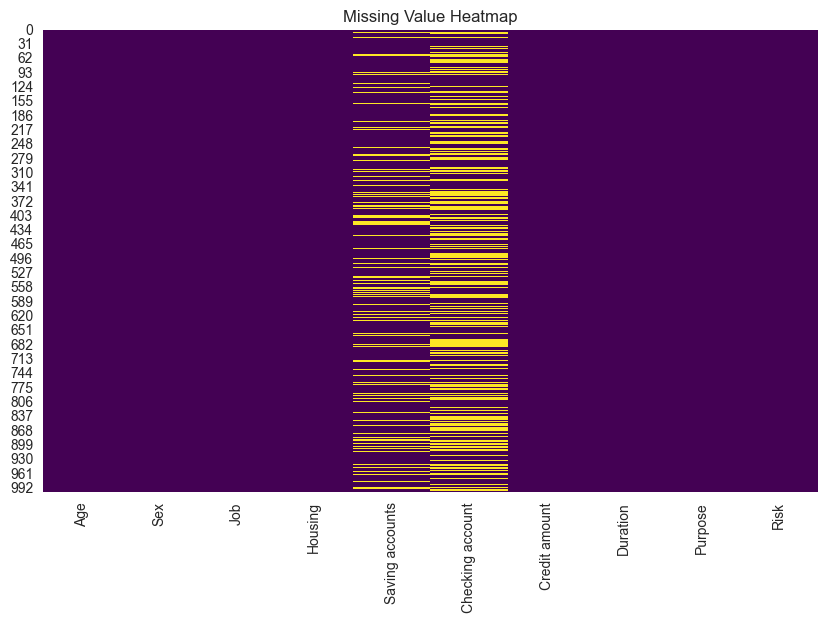

In [10]:
# Visualizing Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

In [11]:
#handling missing values if any 
cat_cols = df.select_dtypes(include= 'object').columns
for col in cat_cols: 
    df[col].fillna(df[col].mode()[0], inplace=True)
    
    print(f"Missing values in {col} after imputation: {df[col].isnull().sum()}")

Missing values in Sex after imputation: 0
Missing values in Housing after imputation: 0
Missing values in Saving accounts after imputation: 0
Missing values in Checking account after imputation: 0
Missing values in Purpose after imputation: 0
Missing values in Risk after imputation: 0


In [12]:
# Duplicate Check and Removal 
duplicates = df.duplicated().sum()
print(f'Duplicate Found : {duplicates}')
df.drop_duplicates(inplace = True)

Duplicate Found : 0


Univerate analysis

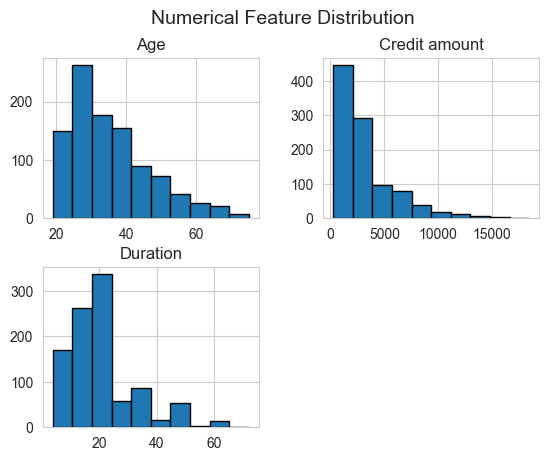

In [13]:
df[["Age", "Credit amount", "Duration"]].hist(bins= 10, edgecolor = "black")
plt.suptitle("Numerical Feature Distribution", fontsize= 14)
plt.show()

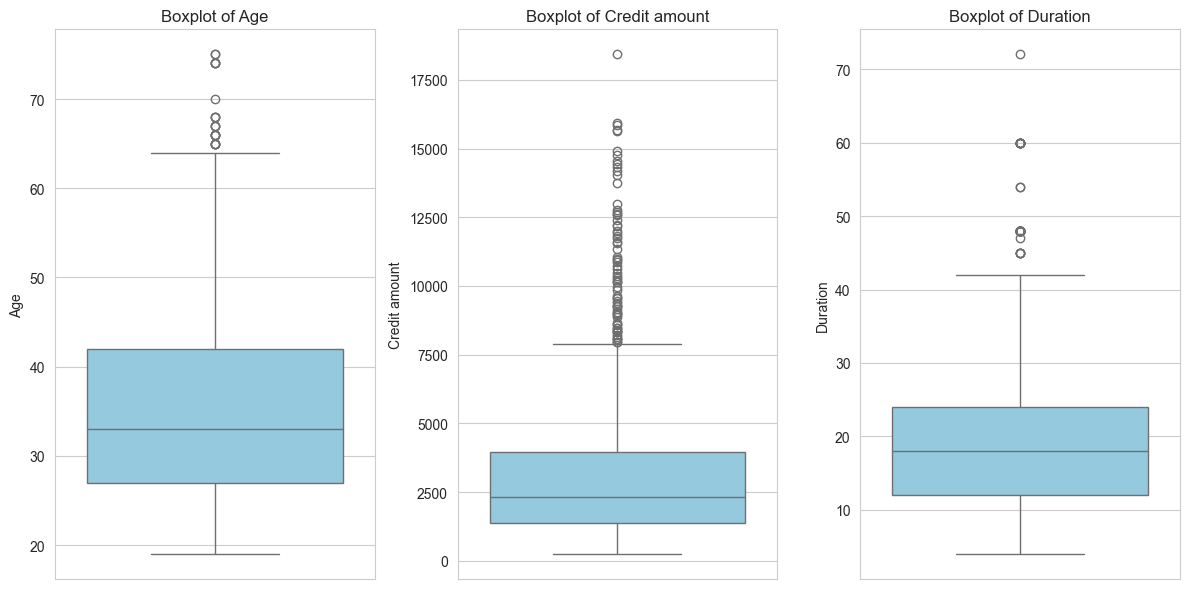

In [14]:
plt.figure(figsize=(12,6))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [15]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
29,63,male,2,own,little,little,6836,60,business,bad
134,21,female,2,own,moderate,little,10144,60,radio/TV,good
255,27,male,1,own,little,moderate,7418,60,radio/TV,good
332,24,female,3,own,moderate,moderate,7408,60,car,bad
373,63,male,3,free,little,little,13756,60,car,good
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
616,27,male,3,free,little,moderate,9157,60,radio/TV,good
637,21,male,2,own,little,little,15653,60,radio/TV,good
672,42,male,3,own,little,little,10366,60,car,good
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


Categorical Columns: ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


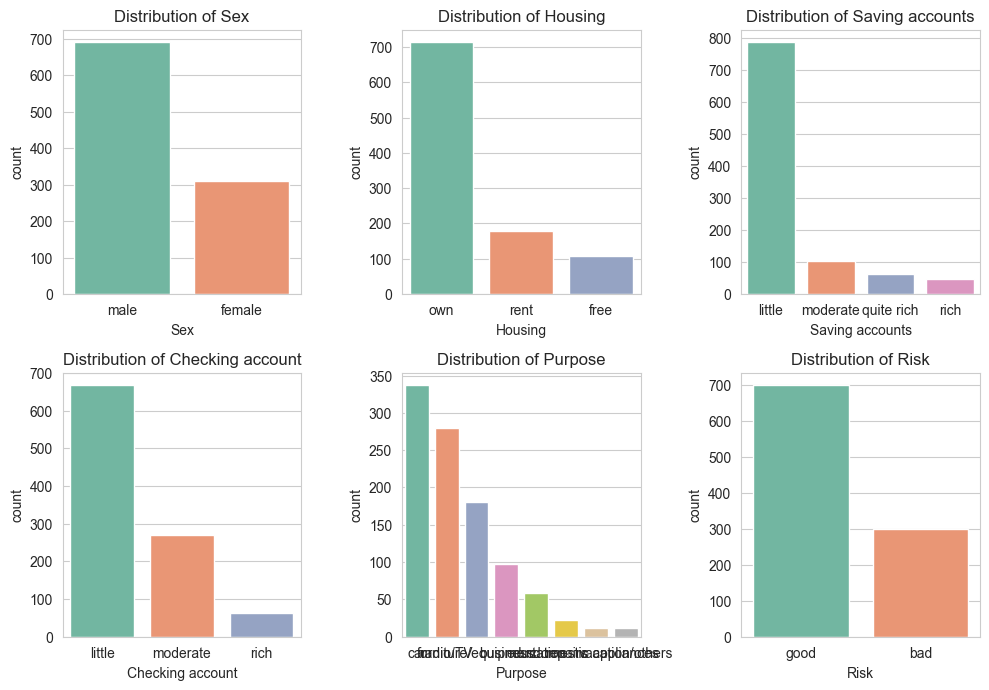

In [16]:

cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", cat_cols)
plt.figure(figsize=(10, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [17]:
corr = df[['Age', 'Job', 'Credit amount', 'Duration']].corr()

In [18]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


<Axes: >

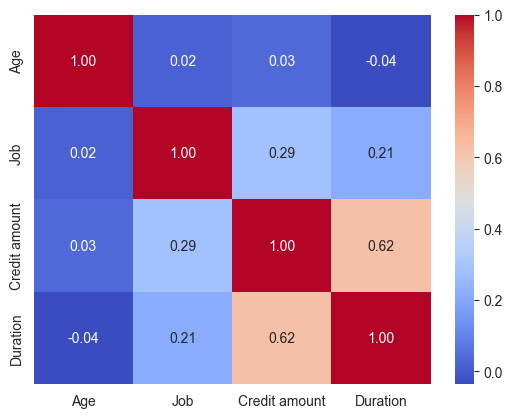

In [19]:
sns.heatmap(corr, annot = True, cmap = "coolwarm",fmt = ".2f"
            )

In [20]:
df.groupby("Job")["Credit amount"].mean()


Job
0    2745.136364
1    2358.520000
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

In [21]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

In [22]:
df.pivot_table(values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


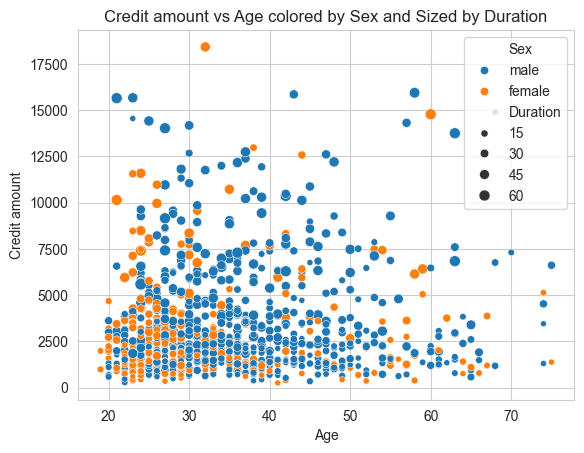

In [23]:
sns.scatterplot(data = df, x = "Age", y = "Credit amount", hue = "Sex", size = "Duration")
plt.title("Credit amount vs Age colored by Sex and Sized by Duration")
plt.show()


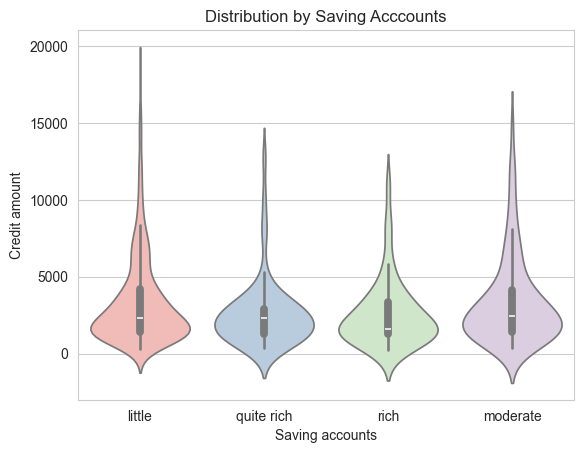

In [24]:
sns.violinplot(data= df , x = "Saving accounts", y = "Credit amount", palette ="Pastel1")
plt.title("Distribution by Saving Acccounts")
plt.show()

In [25]:
df["Risk"].value_counts(normalize = True) * 100 

Risk
good    70.0
bad     30.0
Name: proportion, dtype: float64

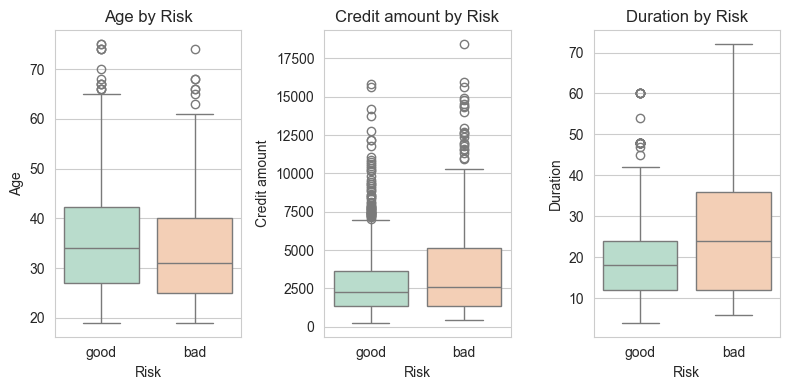

In [26]:
plt.figure(figsize = (8,4))
for i, col in enumerate (["Age","Credit amount", "Duration"]) :
     plt.subplot(1,3,i+1)
     sns.boxplot(data = df, x = "Risk", y = col, palette= "Pastel2")
     plt.title(f"{col} by Risk")
plt.tight_layout()
plt.show()

In [27]:
df.groupby ("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


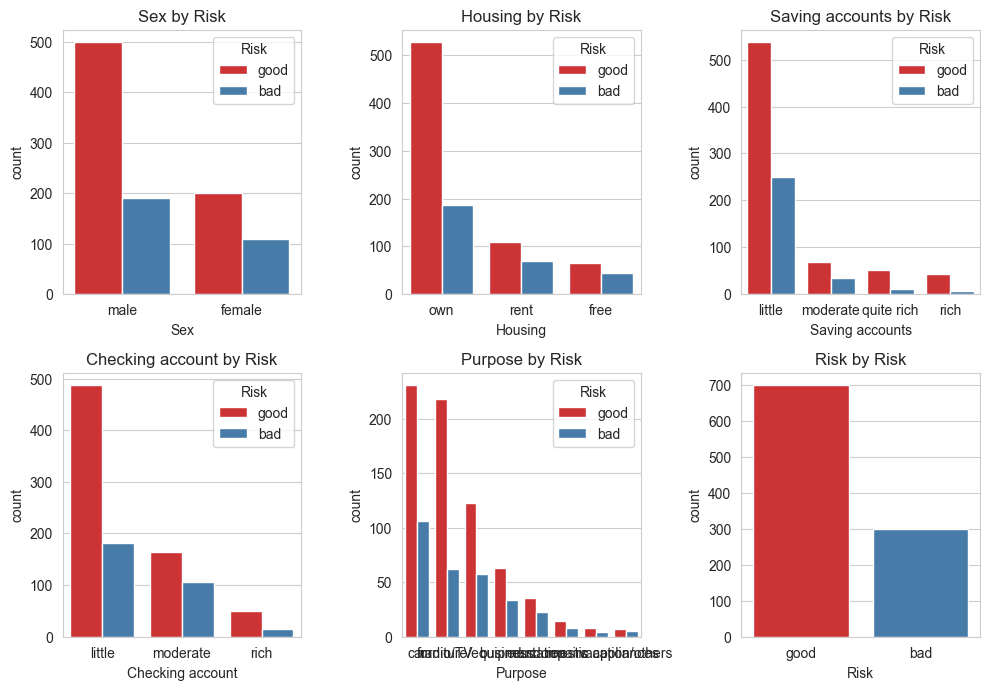

In [28]:
plt.figure(figsize=(10, 10))
for i , col in enumerate(cat_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data = df, x= col , hue = "Risk", palette= "Set1", order = df[col].value_counts().index)
    plt.title(f"{col} by Risk")
plt.tight_layout()
plt.show()

In [29]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [30]:
features =  ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration']

In [31]:
target = "Risk"

In [32]:
df_model= df[features + [target]].copy()
             

In [33]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,male,2,own,little,little,1169,6,good
1,22,female,2,own,little,moderate,5951,48,bad
2,49,male,1,own,little,little,2096,12,good
3,45,male,2,free,little,little,7882,42,good
4,53,male,2,free,little,little,4870,24,bad


In [34]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [35]:
cat_col = df_model.select_dtypes(include= 'object').columns.drop("Risk")

In [36]:
le_dict = {}

In [37]:
cat_col

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [38]:
for col in cat_col:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"encoders/{col}_label_encoder.pkl")

In [39]:
le_target = LabelEncoder()

In [40]:
target

'Risk'

In [41]:
df_model[target] = le_target.fit_transform(df_model[target])

In [42]:
df_model

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,0,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,0,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0
...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,1
996,40,1,3,1,0,0,3857,30,1
997,38,1,2,1,0,0,804,12,1
998,23,1,2,0,0,0,1845,45,0


In [43]:
joblib.dump(le_target, "encoders/target_label_encoder.pkl")

['encoders/target_label_encoder.pkl']

In [44]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,0,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,0,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df_model.drop(target, axis=1)
y = df_model[target]

In [47]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,1,2,1,0,0,1169,6
1,22,0,2,1,0,1,5951,48
2,49,1,1,1,0,0,2096,12
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,0,804,12
998,23,1,2,0,0,0,1845,45


In [48]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [50]:
X_train.shape

(800, 8)

In [51]:
y_test.shape

(200,)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [53]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred), grid.best_params_


In [54]:
dt = DecisionTreeClassifier(random_state=1 , class_weight= "balanced")
df_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [55]:
best_dt_model, dt_acc, dt_class_report, dt_conf_matrix, dt_best_params = train_model(dt, df_param_grid, X_train, y_train, X_test, y_test)

In [56]:
print("Decision Tree Classifier Results:")
print(f"Accuracy: {dt_acc:.4f}")    
print("Classification Report:")
print(dt_class_report)
print("Confusion Matrix:")
print(dt_conf_matrix)
print("Best Parameters:")
print(dt_best_params)

Decision Tree Classifier Results:
Accuracy: 0.5950
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.53      0.44        60
           1       0.76      0.62      0.68       140

    accuracy                           0.59       200
   macro avg       0.57      0.58      0.56       200
weighted avg       0.64      0.59      0.61       200

Confusion Matrix:
[[32 28]
 [53 87]]
Best Parameters:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [57]:
rf = RandomForestClassifier(random_state=1 , class_weight= "balanced", n_jobs=-1)

In [58]:
rf_param_grid = {
    "n_estimators" :[100, 200, 300],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}                                                                                                                                                                                                                                       

In [59]:
best_rf_model, rf_acc, rf_class_report, rf_conf_matrix, rf_best_params = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [60]:
print("Random Forest Classifier Results:")
print(f"Accuracy: {rf_acc}")
print("Classification Report:")
print(rf_class_report)
print("Confusion Matrix:")
print(rf_conf_matrix)
print("Best Parameters:")
print(rf_best_params)

Random Forest Classifier Results:
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.32      0.41        60
           1       0.76      0.91      0.82       140

    accuracy                           0.73       200
   macro avg       0.67      0.61      0.62       200
weighted avg       0.71      0.73      0.70       200

Confusion Matrix:
[[ 19  41]
 [ 13 127]]
Best Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [61]:
 et = ExtraTreesClassifier(random_state=1 , class_weight = "balanced", n_jobs=-1)

In [62]:
et_param_grid = {
    "n_estimators" :[100, 200, 300],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
} 

In [63]:
best_et_model, et_acc, et_class_report, et_conf_matrix, et_best_params = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [64]:
print("Extra Trees Classifier Results:")
print(f"Accuracy: {et_acc:.4f}")
print("Classification Report:")
print(et_class_report)
print("Confusion Matrix:")
print(et_conf_matrix)
print("Best Parameters:")
print(et_best_params)

Extra Trees Classifier Results:
Accuracy: 0.6900
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.37      0.42        60
           1       0.75      0.83      0.79       140

    accuracy                           0.69       200
   macro avg       0.62      0.60      0.60       200
weighted avg       0.67      0.69      0.68       200

Confusion Matrix:
[[ 22  38]
 [ 24 116]]
Best Parameters:
{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [66]:
xgb = XGBClassifier(
	random_state=1,
	scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
	use_label_encoder=False,
	eval_metric="logloss",
)

In [67]:
xgb_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.1], 
    'subsample' : [0.6, 0.8, 1.0],
    "colsample_bytree" : [0.6, 0.8, 1.0]


}

In [68]:
best_xgb_model, xgb_acc, xgb_class_report, xgb_conf_matrix, xgb_best_params = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

In [69]:
print("XGB Classifier Results:")
print(f"Accuracy: {xgb_acc:.4f}")
print("Classification Report:")
print(xgb_class_report)
print("Confusion Matrix:")
print(xgb_conf_matrix)
print("Best Parameters:")
print(xgb_best_params)

XGB Classifier Results:
Accuracy: 0.6550
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.48      0.46        60
           1       0.77      0.73      0.75       140

    accuracy                           0.66       200
   macro avg       0.60      0.61      0.60       200
weighted avg       0.67      0.66      0.66       200

Confusion Matrix:
[[ 29  31]
 [ 38 102]]
Best Parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}


In [71]:
best_rf_model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [72]:
joblib.dump(best_rf_model, "random_forest_credit_model.pkl")

['random_forest_credit_model.pkl']

## Explainable AI (SHAP)
Visualize how each feature drives the credit risk model:
- Global importance: which features move predictions overall.
- Local waterfall: why the model made one specific prediction.

,feature,mean_abs_shap
6,Credit amount,0.093267
7,Duration,0.086901
0,Age,0.074940
5,Checking account,0.034892
3,Housing,0.034394


{'predicted_class': 1, 'prob_good': 0.99, 'prob_bad': 0.01}


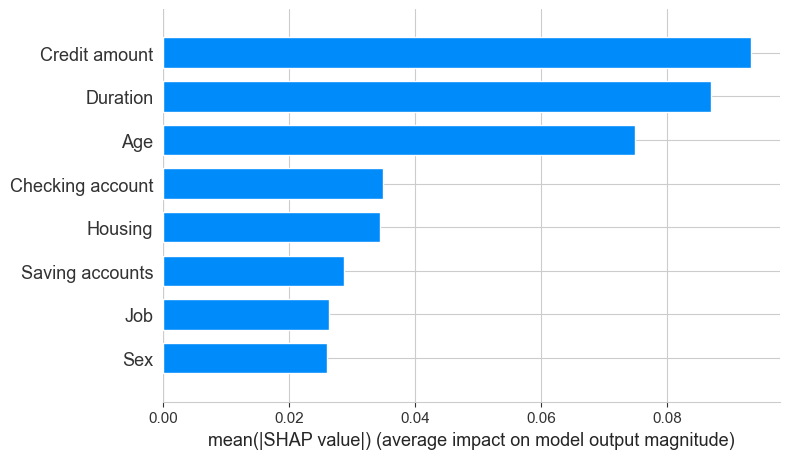

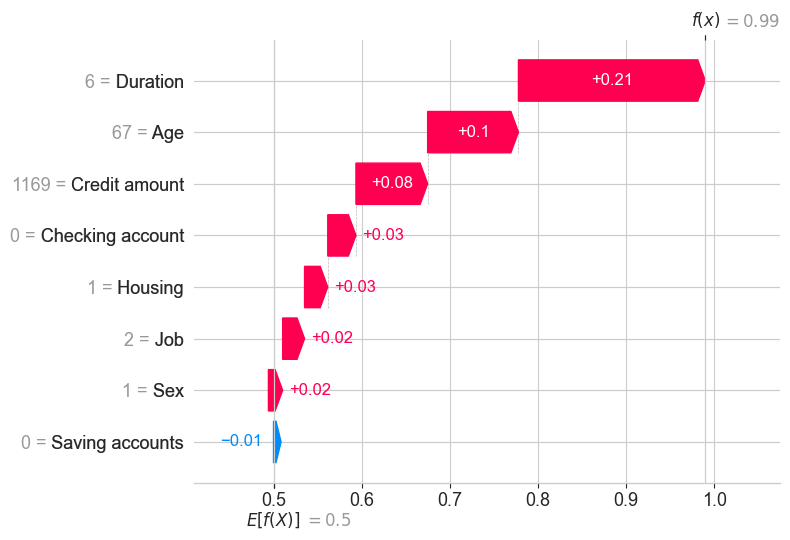

In [82]:

import shap

# SHAP global + local explanations for credit model (simplified)

def normalize_categories(df_raw: pd.DataFrame) -> pd.DataFrame:
    df = df_raw.copy()
    for col, fill_val in FILL_VALUES.items():
        if col in df:
            df[col] = df[col].replace("NA", pd.NA).fillna(fill_val)
    return df

def encode_frame(df_raw: pd.DataFrame, encoders: dict) -> pd.DataFrame:
    df = normalize_categories(df_raw)
    for col in CAT_COLS:
        df[col] = encoders[col].transform(df[col])
    return df

# Load artifacts
model = joblib.load(MODEL_PATH)
encoders = {col: joblib.load(ENCODER_DIR / fname) for col, fname in encoder_files.items()}
explainer = shap.TreeExplainer(model)

# Top 5 mean |SHAP| features
shap_abs = np.abs(shap_global)
if shap_abs.ndim == 3:
    shap_abs = shap_abs[:, :, pred_class]
mean_abs_vals = shap_abs.mean(axis=0)
mean_abs = pd.DataFrame({"feature": FEATURE_COLS, "mean_abs_shap": mean_abs_vals})
top5 = mean_abs.sort_values("mean_abs_shap", ascending=False).head(5)
display(top5)

print({"predicted_class": pred_class, "prob_good": round(float(proba[1]), 4), "prob_bad": round(float(proba[0]), 4)})

# Data
df_raw = pd.read_csv(DATA_PATH)[FEATURE_COLS]
X_bg = encode_frame(df_raw, encoders)
sample = X_bg.iloc[[0]]
proba = model.predict_proba(sample)[0]
pred_class = int(proba.argmax())

# SHAP values (global)
shap_vals_all = explainer.shap_values(X_bg)
shap_global = shap_vals_all[1] if isinstance(shap_vals_all, list) else shap_vals_all

# SHAP values (local)
shap_local_all = explainer.shap_values(sample)
if isinstance(shap_local_all, list):
    sample_values = shap_local_all[pred_class][0]
    base_value = explainer.expected_value[pred_class]
else:
    values = shap_local_all
    if values.ndim == 3:
        sample_values = values[0, :, pred_class]
        base_val = explainer.expected_value
        base_value = base_val[pred_class] if isinstance(base_val, (list, np.ndarray)) else base_val
    else:
        sample_values = values[0] if values.ndim == 2 else values
        base_value = explainer.expected_value

# Plot local force chart
shap.initjs()
force_plot = shap.force_plot(
    base_value,
    sample_values,
    sample.iloc[0],
    feature_names=FEATURE_COLS,
)
display(force_plot)
# Plot global importance
fig, ax = plt.subplots(figsize=(9, 5))
shap_to_plot = shap_global
if shap_to_plot.ndim == 3:
    shap_to_plot = shap_to_plot[:, :, pred_class]
shap.summary_plot(shap_to_plot, X_bg, plot_type="bar", show=False)
plt.tight_layout()
plt.show()

# Plot local waterfall
explanation = shap.Explanation(
    values=sample_values,
    base_values=base_value,
    data=sample.iloc[0],
    feature_names=FEATURE_COLS,
)
fig, ax = plt.subplots(figsize=(9, 6))
shap.plots.waterfall(explanation, max_display=len(FEATURE_COLS), show=False)
plt.tight_layout()
plt.show()


